In [1]:
import pickle

In [2]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import numpy as np
import hdbscan

### Pre-Requisites

https://marissafahlberg.com/a-basic-overview-of-using-t-sne-to-analyze-flow-cytometry-data/
https://towardsdatascience.com/density-based-and-graph-based-clustering-a1f0d45ff5fb

In [3]:
file_path = "hydrated.csv"
colnames = ['tweet_id', 'text', 'num_likes', 'date', 'author']
hydrated_data = pd.read_csv(file_path, names = colnames)

In [4]:
og_data = pd.read_csv("all_tweet_ids.csv")

labels = (og_data.loc[(og_data.Label == 'Hate') | (og_data.Label == 'Counterhate')]\
                     .rename(columns = {"Tweet ID" : "tweet_id"})
             )

In [5]:
#join label information to hydrated data
hydrated_data1 = pd.merge(hydrated_data, labels, how = 'left', on = 'tweet_id')

In [11]:
#SKIP
embeddings = pd.read_csv("hate_counter_embeddings.csv", header = None)

In [12]:
#SKIP
#pickle
outfile = open('pickle_bert_embeddings.pkl','wb')
pickle.dump(embeddings,outfile)
outfile.close()

In [6]:
import pickle
infile = open('pickle_bert_embeddings.pkl','rb')
embeddings = pickle.load(infile)
infile.close()

In [7]:
#ensure that the dimensions are the same
ids = hydrated_data1['tweet_id'].tolist()
small_embeddings = embeddings[embeddings[0].isin(ids)]

id2 = small_embeddings[0].tolist()
hydrated_data2 = hydrated_data1[hydrated_data1['tweet_id'].isin(id2)]
hydrated_data2 = hydrated_data2.set_index('tweet_id')
hydrated_data2 = hydrated_data2.loc[id2]

small_embeddings = small_embeddings.iloc[: , 1:]
embedding_array = small_embeddings.to_numpy()

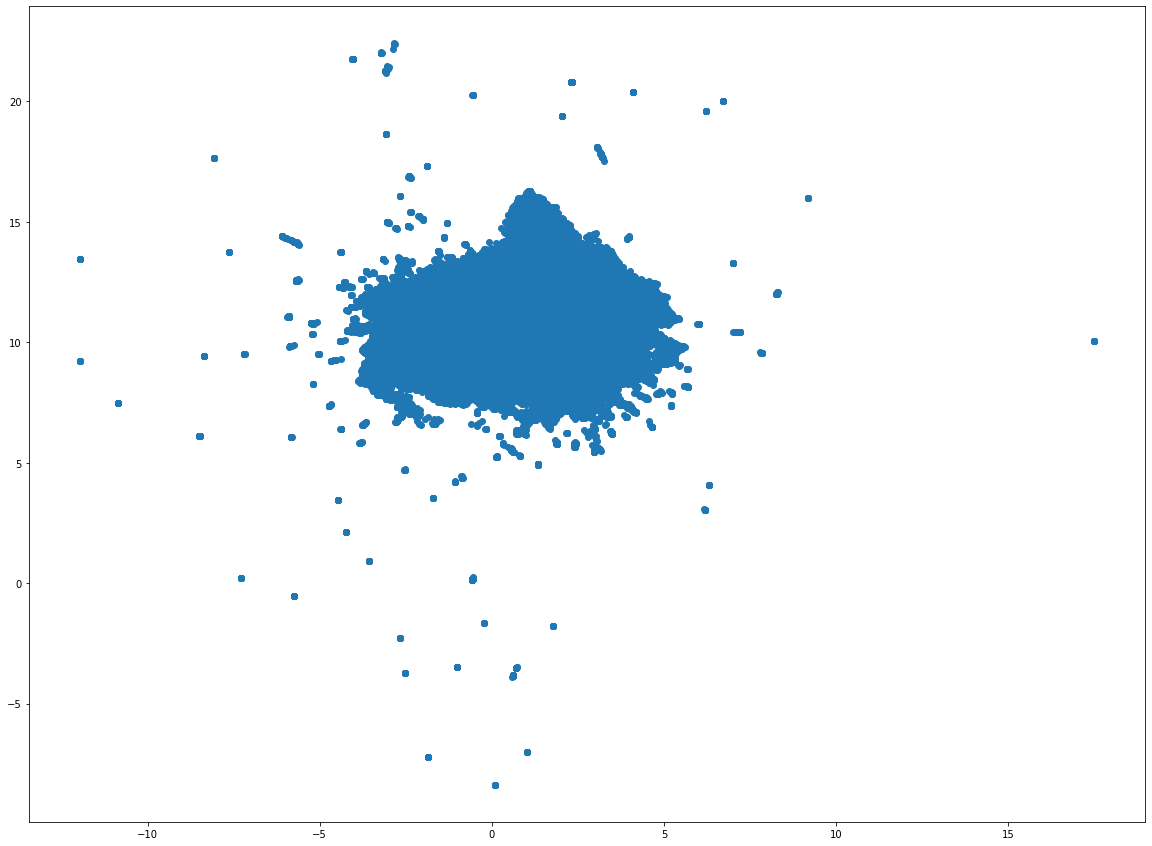

In [10]:
plot, standard_embedding = plt_usingUMAP(embedding_array)
plot.show()

In [ ]:
clusterer, labels, plot = clustering(embeddings,standard_embedding)

/Users/maggiewu/opt/anaconda3/envs/REU_2021/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/maggiewu/opt/anaconda3/envs/REU_2021/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/maggiewu/opt/anaconda3/envs/REU_2021/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/maggiewu/opt/anaconda3/envs/REU_2021/lib/python3.8/site-packages/umap/spect

In [9]:
def read_embeddings(path):
    '''
    Function to read embeddings as dataframe and create a numpy array with the embeddings
    parameters: path - path for pickle file
    output - df_embeddings - dataframe, embeddings - numpy array
    '''
    df_embeddings = pd.read_pickle(path)
    embeddings = []
    for paper_id, row in df_embeddings.iterrows():
      embeddings.append(row['embedding'])
    embeddings = np.array(embeddings)
    return df_embeddings, embeddings

def plt_usingUMAP(data):
    '''
    Function to visualize high dimensional data by using UMAP dimensionality reduction
    parameters: data - High dimensional data as nparray
    output: plt - matplotlib plot object, standard_embedding - high dimensionality data reduced to 2D
    '''
    standard_embedding = umap.UMAP(random_state=42,n_components=2).fit_transform(data)
    plt.figure(figsize=(20, 15))
    plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1])
    return plt, standard_embedding


def clustering(embeddings,standard_embedding,n_components=100,min_samples=25,min_cluster_size=75):
    '''
    Function to reduce dimensions using UMAP and cluster the reduced data
    parameters: embeddings - high dimensional data, standard_embedding - data with reduced dimensions to 2D
    n_components - required dimensions after applying UMAP, min_samples - hdbscan input, min_cluster_size - hdbscan input
    output: clusterer - hdbscan object, labels - labels generated by hdbscan, plt - matplotlib plot object
    
    '''
    clusterable_embedding = umap.UMAP(
        n_neighbors=30,
        min_dist=0.0,
        n_components=n_components,
        random_state=42,
    ).fit_transform(embeddings)
    
    clusterer = hdbscan.HDBSCAN(
    min_samples=min_samples,
    min_cluster_size=min_cluster_size).fit(clusterable_embedding)
    
    labels = clusterer.labels_
    
    clustered = (labels >= 0)
    plt.figure(figsize=(20, 15))
    plt.scatter(standard_embedding[~clustered, 0],
                standard_embedding[~clustered, 1],
                c=(0.5, 0.5, 0.5),
                s=0.1,
                alpha=0.5)
    plt.scatter(standard_embedding[clustered, 0],
                standard_embedding[clustered, 1],
                c=labels[clustered],
                s=0.1,
                cmap='Spectral');
    return clusterer, labels, plt

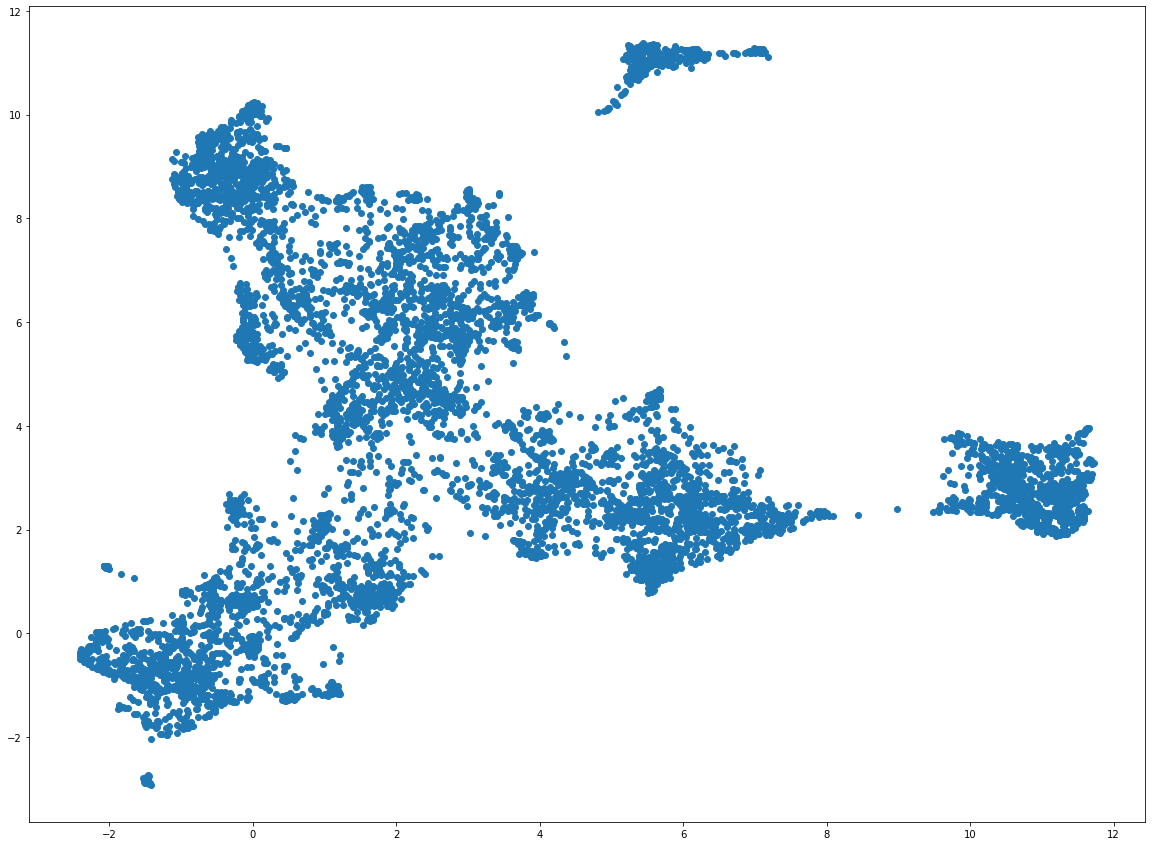

In [6]:
path = 'df_sme_huggingface_embeddings.pkl'
df_embeddings, embeddings = read_embeddings(path)
plot, standard_embedding = plt_usingUMAP(embeddings)
plot.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


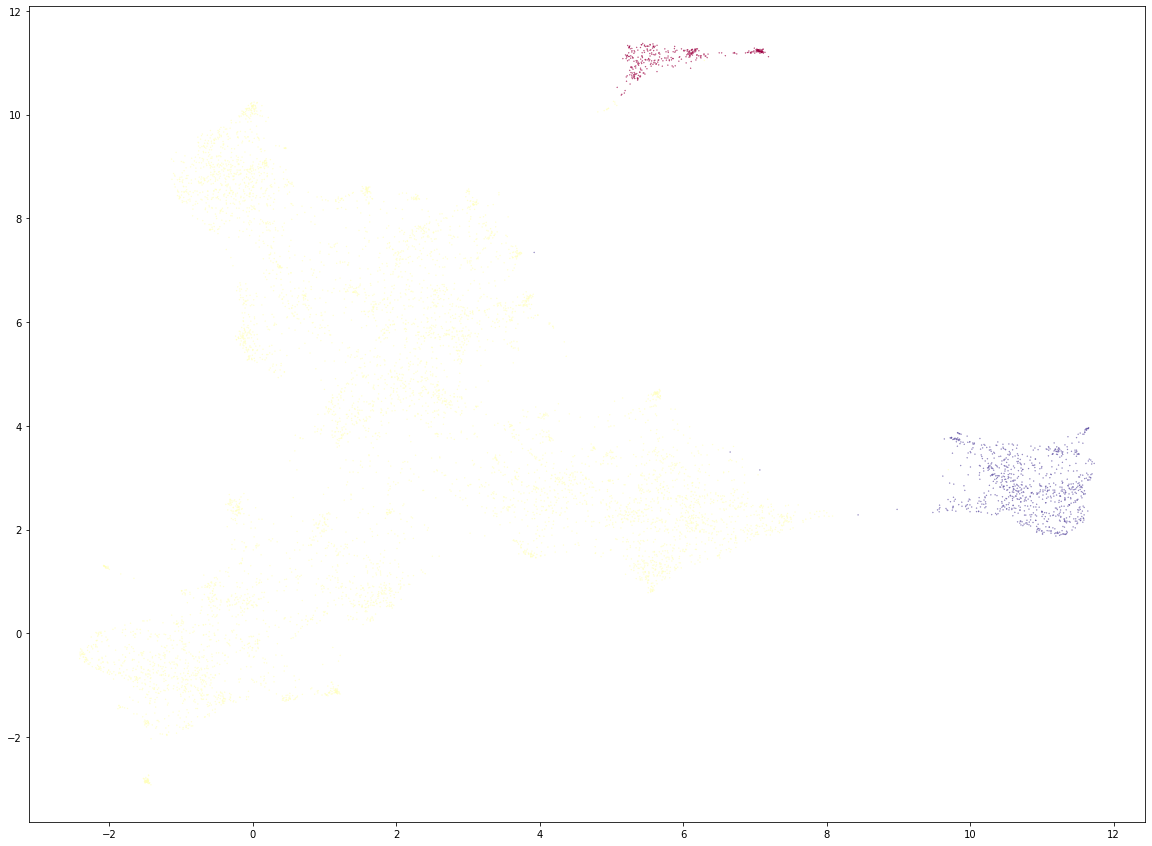

In [7]:
clusterer, labels, plot = clustering(embeddings,standard_embedding)